In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from nltk.stem import PorterStemmer
ps = PorterStemmer()
import nltk
import contractions
import re
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()

stop_words = nltk.corpus.stopwords.words('english')
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.layers import LSTM, Dense

In [2]:
# import data
customer_reviews =pd.read_excel('Womens Clothing Reviews Data.xlsx')

In [3]:
customer_reviews

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


In [4]:
customer_reviews.head(5)

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [5]:
customer_reviews.duplicated().sum()

3

In [6]:
customer_reviews.drop_duplicates()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


In [7]:
customer_reviews['Category'].value_counts()

General           13850
General Petite     8120
Initmates          1502
Name: Category, dtype: int64

In [8]:
customer_reviews['Subcategory1'].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Subcategory1, dtype: int64

In [9]:
customer_reviews['Recommend Flag'].value_counts()

1    19314
0     4172
Name: Recommend Flag, dtype: int64

In [10]:
customer_reviews['SubCategory2'].value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: SubCategory2, dtype: int64

In [11]:
customer_reviews['Channel'].value_counts()

Web       13583
Mobile     9903
Name: Channel, dtype: int64

In [12]:
customer_reviews.isnull().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

In [13]:
customer_reviews['Category'] = customer_reviews['Category'].dropna().mode()[0]

In [14]:
customer_reviews['SubCategory2'] = customer_reviews['SubCategory2'].dropna().mode()[0]

In [15]:
customer_reviews['Subcategory1'] = customer_reviews['Subcategory1'].dropna().mode()[0]

In [16]:
customer_reviews.isnull().sum()

Product ID           0
Category             0
Subcategory1         0
SubCategory2         0
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

In [17]:
# Combining 'Review Title' and 'Review Text' columns
customer_reviews['Reviews'] = customer_reviews['Review Title'].fillna('') + ' ' + customer_reviews['Review Text'].fillna('')


In [18]:
customer_reviews

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Reviews
0,767,General,Tops,Dresses,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,Absolutely wonderful - silky and sexy and com...
1,1080,General,Tops,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,Love this dress! it's sooo pretty. i happen...
2,1077,General,Tops,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,Some major design flaws I had such high hopes ...
3,1049,General,Tops,Dresses,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,"My favorite buy! I love, love, love this jumps..."
4,847,General,Tops,Dresses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,Flattering shirt This shirt is very flattering...
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General,Tops,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,Great dress for many occasions I was very happ...
23482,862,General,Tops,Dresses,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,Wish it was made of cotton It reminds me of ma...
23483,1104,General,Tops,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,"Cute, but see through This fit well, but the t..."
23484,1084,General,Tops,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,"Very cute dress, perfect for summer parties an..."


In [19]:
customer_reviews.drop(['Review Title', 'Review Text'], axis=1, inplace=True)

In [20]:
customer_reviews

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Rating,Recommend Flag,Reviews
0,767,General,Tops,Dresses,Mumbai,Mobile,33,4,1,Absolutely wonderful - silky and sexy and com...
1,1080,General,Tops,Dresses,Bangalore,Mobile,34,5,1,Love this dress! it's sooo pretty. i happen...
2,1077,General,Tops,Dresses,Gurgaon,Mobile,60,3,0,Some major design flaws I had such high hopes ...
3,1049,General,Tops,Dresses,Chennai,Web,50,5,1,"My favorite buy! I love, love, love this jumps..."
4,847,General,Tops,Dresses,Bangalore,Web,47,5,1,Flattering shirt This shirt is very flattering...
...,...,...,...,...,...,...,...,...,...,...
23481,1104,General,Tops,Dresses,Gurgaon,Mobile,34,5,1,Great dress for many occasions I was very happ...
23482,862,General,Tops,Dresses,Gurgaon,Web,48,3,1,Wish it was made of cotton It reminds me of ma...
23483,1104,General,Tops,Dresses,Gurgaon,Web,31,3,0,"Cute, but see through This fit well, but the t..."
23484,1084,General,Tops,Dresses,Gurgaon,Web,28,3,1,"Very cute dress, perfect for summer parties an..."


In [21]:
customer_reviews.isnull().sum()

Product ID        0
Category          0
Subcategory1      0
SubCategory2      0
Location          0
Channel           0
Customer Age      0
Rating            0
Recommend Flag    0
Reviews           0
dtype: int64

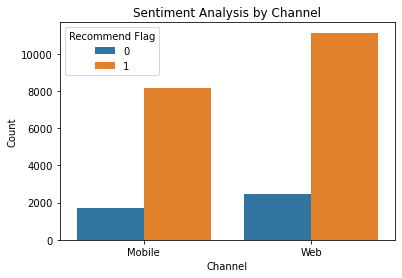

In [22]:
# Sentiment Analysis by Channel
sns.countplot(x='Channel', hue='Recommend Flag', data=customer_reviews)
plt.title('Sentiment Analysis by Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()

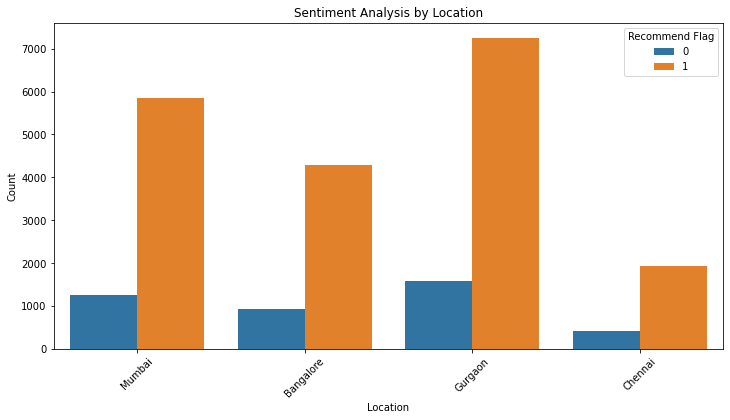

In [23]:
# Sentiment Analysis by Location
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', hue='Recommend Flag', data=customer_reviews)
plt.title('Sentiment Analysis by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

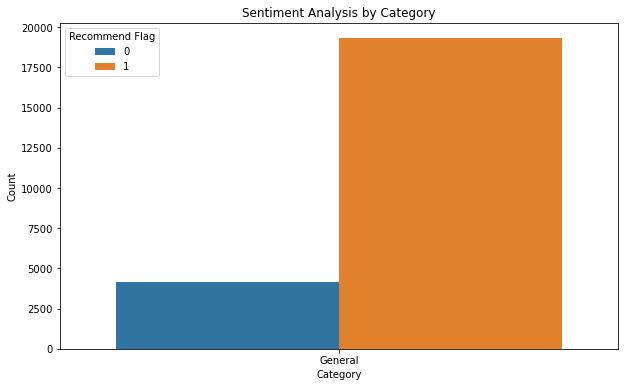

In [24]:
# Sentiment Analysis by Category
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', hue='Recommend Flag', data=customer_reviews)
plt.title('Sentiment Analysis by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

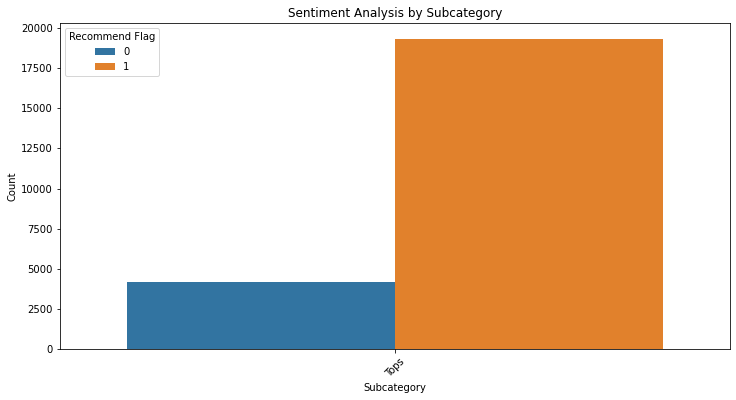

In [25]:
# Sentiment Analysis by Subcategory
plt.figure(figsize=(12, 6))
sns.countplot(x='Subcategory1', hue='Recommend Flag', data=customer_reviews)
plt.title('Sentiment Analysis by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

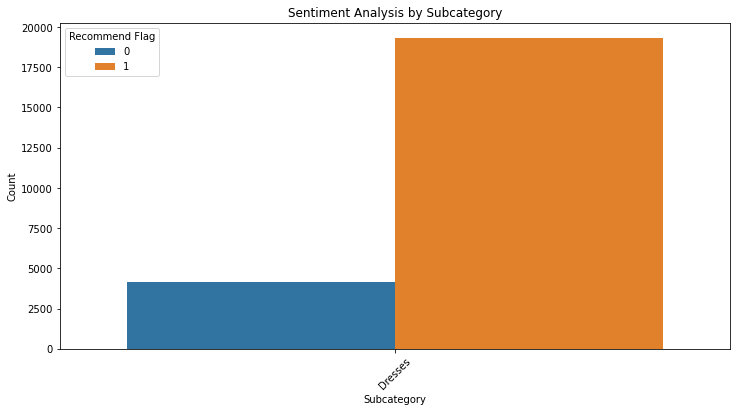

In [26]:
# Sentiment Analysis by Subcategory2
plt.figure(figsize=(12, 6))
sns.countplot(x='SubCategory2', hue='Recommend Flag', data=customer_reviews)
plt.title('Sentiment Analysis by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

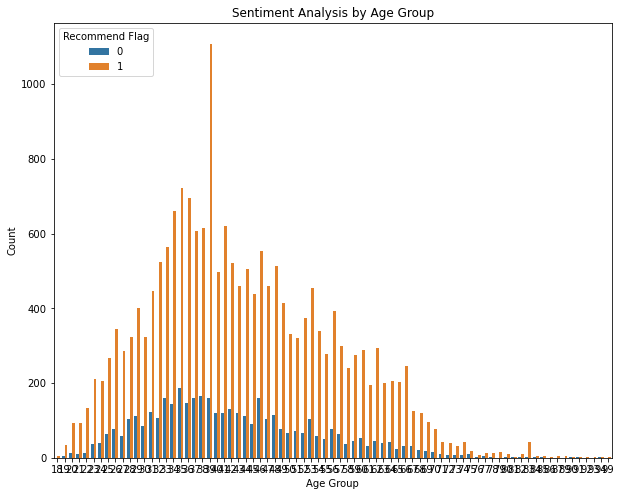

In [27]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Customer Age', hue='Recommend Flag', data=customer_reviews)
plt.title('Sentiment Analysis by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

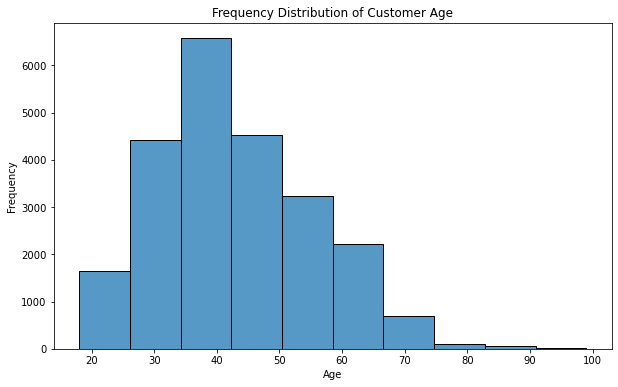

In [28]:
# frequency plot
plt.figure(figsize=(10, 6))
sns.histplot(customer_reviews['Customer Age'], bins=10, kde=False)
plt.title('Frequency Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [29]:
# Covert to lower case 
def convert_lower(text):
    text = text.lower()
    return text

# Expanding contractions
def expand_contractions(text):
    text = contractions.fix(text)
    return text 

def remove_special_char_and_digits(text):
    text = re.sub('[^a-z\s]','',text)
    text = re.sub('\s{2,}'," ",text)
    return text

def stemming(text):
    text = [ ps.stem(w) for w in text.split()]
    return (' '.join(text))

def lemmatization(text):
    text = [ lm.lemmatize(w,'v') for w in text.split()]
    return (' '.join(text))

def stopword_removal(text):
    text = [ word for word in text.split() if word not in stop_words]
    return (' '.join(text))
 

In [30]:
def clean_text(text,base_form):
    text = convert_lower(text)
    
    text = expand_contractions(text)
    
    text = remove_special_char_and_digits(text)
    
    if(base_form =='stem'):
        text = stemming(text)
    else:
        text = lemmatization(text)
        
    text = stopword_removal(text)
    
    return text

In [31]:
customer_reviews['Reviews'] = customer_reviews['Reviews'].apply(lambda x: clean_text(x,'lem'))

In [32]:
customer_reviews['Reviews']

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happen find store glad ...
2        major design flaw high hop dress really want w...
3        favorite buy love love love jumpsuit fun flirt...
4        flatter shirt shirt flatter due adjustable fro...
                               ...                        
23481    great dress many occasion happy snag dress gre...
23482    wish make cotton remind maternity clothe soft ...
23483    cute see fit well top see never would work gla...
23484    cute dress perfect summer party buy dress wed ...
23485    please make like one dress lovely platinum fem...
Name: Reviews, Length: 23486, dtype: object

In [33]:
customer_reviews_data = customer_reviews[['Reviews', 'Recommend Flag']]


In [34]:
customer_reviews_data['Reviews']

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happen find store glad ...
2        major design flaw high hop dress really want w...
3        favorite buy love love love jumpsuit fun flirt...
4        flatter shirt shirt flatter due adjustable fro...
                               ...                        
23481    great dress many occasion happy snag dress gre...
23482    wish make cotton remind maternity clothe soft ...
23483    cute see fit well top see never would work gla...
23484    cute dress perfect summer party buy dress wed ...
23485    please make like one dress lovely platinum fem...
Name: Reviews, Length: 23486, dtype: object

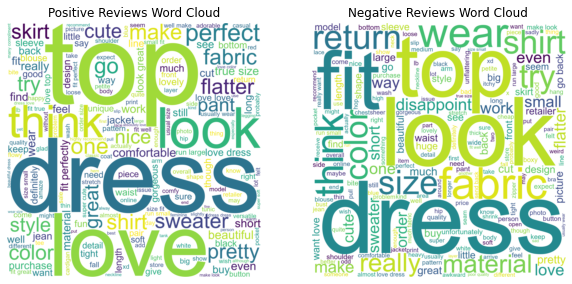

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word Clouds for positive and negative reviews
positive_reviews = customer_reviews_data[customer_reviews_data['Recommend Flag'] == 1]['Reviews'].values
negative_reviews = customer_reviews_data[customer_reviews_data['Recommend Flag'] == 0]['Reviews'].values

# Specify the path to a TrueType font file
font_path = r"C:\Windows\Fonts\Arial.ttf"  # Example font file path

# Generate word clouds with the specified font
positive_wordcloud = WordCloud(width=2000, height=2000, background_color='white', font_path=font_path).generate(' '.join(positive_reviews))
negative_wordcloud = WordCloud(width=2000, height=2000, background_color='white', font_path=font_path).generate(' '.join(negative_reviews))

# Plot word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()


In [36]:
import gensim

In [37]:
from gensim.models.fasttext import FastText

In [38]:
X = FastText(customer_reviews_data['Reviews'],vector_size=150)

In [39]:
X

In [40]:
Y=customer_reviews_data['Recommend Flag']

In [41]:
# Assuming X contains FastText embeddings
X_embeddings = [X.wv[word] for word in customer_reviews_data['Reviews']]

# Convert the embeddings into a numpy array
X_array = np.array(X_embeddings)

# Now you can use train_test_split
from sklearn.model_selection import train_test_split
Y = customer_reviews_data['Recommend Flag']
xtrain, xtest, ytrain, ytest = train_test_split(X_array, Y, test_size=0.20, random_state=45)


In [42]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((18788, 150), (4698, 150), (18788,), (4698,))

In [43]:
xtrain_reshaped = np.expand_dims(xtrain, axis=-1)
xtest_reshaped = np.expand_dims(xtest, axis=-1)


In [44]:
# Define your model with reduced layers and dropout
model1 = Sequential([
    LSTM(units=50, activation='relu', return_sequences=True, input_shape=(xtrain_reshaped.shape[1], xtrain_reshaped.shape[2])),
    Dropout(0.2),  # Add dropout layer to prevent overfitting
    LSTM(units=16, activation='relu'),  # Reduced units and removed return_sequences
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model1.fit(xtrain_reshaped, ytrain, epochs=2, batch_size=200, validation_data=(xtest_reshaped, ytest))


Epoch 1/2
94/94 [==============================] - 35s 334ms/step - loss: 0.7438 - accuracy: 0.8221 - val_loss: 0.5928 - val_accuracy: 0.8221
Epoch 2/2
94/94 [==============================] - 30s 320ms/step - loss: 0.5768 - accuracy: 0.8224 - val_loss: 0.5616 - val_accuracy: 0.8221


In [45]:
from sklearn.metrics import accuracy_score
y_pred = model1.predict(xtest_reshaped)

# Convert the predicted probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(ytest, y_pred_binary)

print("Accuracy:", accuracy)


147/147 [==============================] - 6s 38ms/step
Accuracy: 0.8220519369944658


In [46]:
# Define the model with reduced hidden units
model = Sequential([
    GRU(units=32, activation='relu', return_sequences=True, input_shape=(xtrain_reshaped.shape[1], xtrain_reshaped.shape[2])),
    Dropout(0.5),  # Add dropout after the first GRU layer
    GRU(units=16, activation='relu', return_sequences=True),
    Dropout(0.5),  # Add dropout after the second GRU layer
    GRU(units=8, activation='relu'),  # Last GRU layer typically doesn't return sequences
    Dropout(0.5),  # Add dropout after the third GRU layer
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(xtrain_reshaped, ytrain, epochs=3, batch_size=100, validation_data=(xtest_reshaped, ytest))


Epoch 1/3
188/188 [==============================] - 46s 207ms/step - loss: 0.5360 - accuracy: 0.8150 - val_loss: 0.4751 - val_accuracy: 0.8221
Epoch 2/3
188/188 [==============================] - 38s 204ms/step - loss: 0.5028 - accuracy: 0.8224 - val_loss: 0.4779 - val_accuracy: 0.8221
Epoch 3/3
188/188 [==============================] - 39s 208ms/step - loss: 0.4978 - accuracy: 0.8224 - val_loss: 0.4733 - val_accuracy: 0.8221


In [47]:
# Predict using the trained model
y_pred = model.predict(xtest_reshaped)

# Convert predicted probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(ytest, y_pred_binary)

print("Accuracy:", accuracy)


147/147 [==============================] - 6s 37ms/step
Accuracy: 0.8220519369944658


In [48]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(xtrain, ytrain)

# Predict on the testing data
predictions = rf_classifier.predict(xtest)

# Calculate accuracy
accuracy = accuracy_score(ytest, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.8226905065985526


# predicting rating based on review

In [49]:
Y_rating=customer_reviews['Rating']

In [50]:
Y_rating.value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

In [51]:
xtrainr, xtestr, ytrainr, ytestr = train_test_split(X_array, Y_rating, test_size=0.20, random_state=45)

In [52]:
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(xtrainr, ytrainr)

# Predict the ratings on the test set
predictions = rf_classifier.predict(xtestr)

# Calculate accuracy
accuracy = accuracy_score(ytestr, predictions)
print("Accuracy:", accuracy)

# Generate and print classification report
print(classification_report(ytestr, predictions))


Accuracy: 0.5568326947637292
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       157
           2       1.00      0.00      0.01       302
           3       0.25      0.00      0.00       590
           4       0.26      0.02      0.03      1030
           5       0.56      0.99      0.72      2619

    accuracy                           0.56      4698
   macro avg       0.41      0.20      0.15      4698
weighted avg       0.47      0.56      0.41      4698

